<a href="https://colab.research.google.com/github/leobioinf0/00-app_project/blob/main/00_app_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -U veryfi
%pip install openrouteservice

## import

In [21]:
from os.path import isfile, join
import openrouteservice as ors
import folium
from os import listdir
from veryfi import Client
import re
import pandas as pd
from veryfi import Client
import json
import os
import numpy as np 
import seaborn as sns 

from datetime import timedelta
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## funct

In [4]:
def mk_dir(name):
    '''crear el directorio con el nombre que le pasas'''
    path = os.path.join(os.getcwd(), name)
    if not os.path.exists(path):
        try:
            os.makedirs(path, 0o700)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise
        print("Directorio creado: {}".format(path))
    else:
        print("Directorio ya existente: {}".format(path))
    return path

def get_resp(response):
    #print(response["bill_to"]["name"])
    print("Total:\t{}".format(response["total"]))
    print("Divisa:\t{}".format(response["currency_code"]))
    print("Fecha:\t{}".format(response["date"]))
    print("Ticket:\t{}".format(response["invoice_number"]))
    print("Items:\t{}".format(response["line_items"][0]["description"]))
    print("Precio:\t{}".format(response["line_items"][0]["price"]))
    print("Cant:\t{}".format(response["line_items"][0]["quantity"]))
    print("Tax:\t{}".format(response["line_items"][0]["tax"]))
    print("Total:\t{}".format(response["line_items"][0]["total"]))
    print("Nombre:\t{}".format(response["payment"]["display_name"]))
    print("Método:\t{}".format(response["payment"]["type"]))
    print("Razón:\t{}".format(response["vendor"]["name"]))
    print("Tipo:\t{}".format(response["vendor"]["type"]))
    print("Logo:\t{}".format(response["vendor"]["logo"]))
    print("Dir:\t{}".format(response["vendor"]["address"]))
    print("Categ:\t{}".format(response["vendor"]["category"]))
    print("img:\t{}".format(response["img_url"]))

## set WD

In [5]:
# Definir el directorio de trabajo
cwd = "./00-app_project"
os.chdir(cwd)
print(os.getcwd())

/content/drive/MyDrive/00-app_project


In [ ]:
# Crear directorios
data_path = mk_dir("data")

# DDBB


## [veryfi_client](https://veryfi.github.io/veryfi-python/)

In [7]:
client_id = 'vrfDfDElvD*************tFiztngBUN'
client_secret = 'N188ArbVjSVy44RUJhJUBbooN1JKGAZOL0SYrCfMD*******************j6zvpLUr0S4SeGTA5wZEGGtj0orXPtHmcoZHvTeJv51Pj0Eme3wK'
username = 'leon*****ho'
api_key = 'b7b406eb008*********4da288e'
veryfi_client = Client(client_id, client_secret, username, api_key)

## tickets-img

In [10]:
mypath="./data/tickets"

In [11]:
onlyfiles = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
responses_list = [veryfi_client.process_document(f) for f in onlyfiles]

In [ ]:
with open('./data/responses_lst.json', 'w') as fout:
    json.dump(responses_list, fout)

In [12]:
f = open('./data/responses_lst.json')
responses_list = json.load(f)

## responses_list to DF

In [13]:
df = pd.json_normalize(responses_list)

In [14]:
df.drop_duplicates(subset=['id'], inplace=True)

In [15]:
df = df[df['duplicate_of'].isna()]

In [17]:
df.head()

,account_number,cashback,category,created_date,currency_code,date,delivery_date,discount,document_reference_number,document_title,...,vendor.fax_number,vendor.iban,vendor.logo,vendor.name,vendor.phone_number,vendor.raw_name,vendor.reg_number,vendor.type,vendor.vat_number,vendor.web
0,None,None,Office Supplies & Software,2022-03-24 21:35:21,EUR,2022-02-09 00:00:00,2022-02-09,NaN,None,Factura Simplificada,...,None,None,https://cdn.veryfi.com/logos/us/432282625.jpg,Media Markt,900 205 000,Media Markt,None,Electronics Store,ESA64421738,None
1,516097,None,Grocery,2022-03-24 21:52:28,EUR,2022-03-21 13:40:00,None,NaN,None,None,...,None,None,https://cdn.veryfi.com/logos/us/317031922.gif,Lidl,900958311,Lidl,None,Grocery,A60195278,None
2,None,None,Grocery,2022-03-24 22:32:25,EUR,2014-12-01 18:35:00,None,NaN,None,None,...,None,None,https://cdn.veryfi.com/logos/us/632580219.png,Mercadona,971145800,Mercadona,None,"supermarket,grocery_or_supermarket,food,store",A-46103834,None
3,None,None,Meals & Entertainment,2022-03-24 22:42:28,USD,2020-09-19 00:00:00,None,NaN,None,None,...,None,None,https://cdn.veryfi.com/logos/tmp/161748618.png,Receiptify,None,RECEIPTIFY,None,None,None,None
4,None,None,Meals & Entertainment,2022-03-24 23:17:01,EUR,2021-11-28 19:23:00,None,NaN,40082018,None,...,None,None,https://cdn.veryfi.com/logos/us/950290923.png,GUESS,None,GUESS,None,"clothing_store,store",384869288,None


In [ ]:
df.to_csv("./data/db.csv")

## pasar json a base de datos....

In [ ]:
# df.columns
# describer(df[df.columns.difference(['line_items','tax_lines'])])
# data_table.DataTable(df[df.columns.difference(['line_items','tax_lines','img_thumbnail_url','img_url','pdf_url','ocr_text'])], max_columns=70)
# data_table.DataTable(df, max_columns=70)
# df[df.columns.difference(['bill_to','line_items','meta','ship_to', 'payment','vendor','tax_lines'])]
# df = df[["id", "date", "subtotal", "tax", "total", "currency_code", "payment.type", 
#          "bill_to.name", "vendor.type", "vendor.name", "bill_to.address", 
#          "vendor.address", "vendor.logo", "img_file_name", "img_thumbnail_url", 
#          "img_url", "pdf_url"]]

# Customer-Segmentation

In [18]:
df = pd.read_csv("./data/tdf.csv", parse_dates=["date"])

In [19]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.rename(columns = {'index': 'InvoiceNo'}, inplace=True)
df["date"] = df["date"].dt.date
df.rename(columns={'date':'InvoiceDate'}, inplace=True)
df.rename(columns={'total':'TotalSum'}, inplace=True)
df.rename(columns={'bill_to.name':'CustomerID'}, inplace=True)

In [22]:
snapshot_date = max(df.InvoiceDate) + timedelta(days=1)

In [23]:
customers = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

In [24]:
# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [25]:
customers

,Recency,Frequency,MonetaryValue
CustomerID,,,
31 Stephane,280,1,35.80
A BARCELONETA,833,1,66.20
APT. SALESPERSON,368,1,324.00
ATENDU PUR: Karon,833,1,35.20
Aaron Hawkins,10,2,119.90
...,...,...,...
Yoseph Carroll,281,5,148.60
Zuschuss Carroll,6,18,9567.54
Zuschuss Donatelli,280,4,147.95


In [26]:
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
759,10.503259,1.736697,5.296711
760,2.158415,3.318115,21.229190
761,10.492143,1.480043,5.288977
762,11.627992,1.156954,12.805792
763,14.292794,0.000000,8.772833


In [27]:
scaler = StandardScaler()# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[ 0. -0.  0.]
[1. 1. 1.]


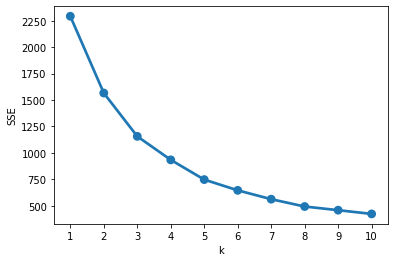

In [28]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroidplt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [29]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(764,)

In [30]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        602.54      1.89        308.81   331
1        201.75      6.24        975.07   395
2        287.92      6.53      50338.23    38

In [31]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')

df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,31 Stephane,0,Recency,0.113278
1,A BARCELONETA,0,Recency,1.280495
2,APT. SALESPERSON,0,Recency,0.382213
3,ATENDU PUR: Karon,0,Recency,1.280495
4,Aaron Hawkins,1,Recency,-2.208887


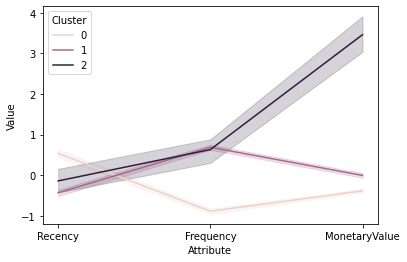

In [32]:
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt)

# Negocios de Villadecans

In [33]:
stores = pd.read_csv("./data/stores.csv", sep="\t", header=None )
stores.columns = ["hacer","sector","servicio","contacto","loc", "dir", "barri"]
stores

,hacer,sector,servicio,contacto,loc,dir,barri
0,On comprar?,Moda i complements,Roba i complements,bolsosbelofmay@gmail.com,http://maps.google.com/maps?layer=c&cbll=41.31...,"Carrer del Doctor Reig, 61",L'Eixample Centre
1,On comprar?,Esports,Articles esportius: roba i complements,barroso@barrosoesports.com,http://maps.google.com/maps?layer=c&cbll=41.31...,"Carrer de Pi i Margall, 30-32",Barri Antic
2,On menjar?,Bars,Bars,info@grupolancaster.com,http://maps.google.com/maps?layer=c&cbll=41.31...,"Carrer de Jaume I, 39-41",Barri de Sales
3,On comprar?,Alimentació,Xarcuteries,contacta@xarcuteria-olive.com,http://maps.google.com/maps?layer=c&cbll=41.31...,"Carrer d’Àngel Guimerà , 15",Barri Antic
4,On comprar?,Productes per la llar,Floristeries i Jardineria,floristeriaraquel@floristeriaraquel.com,http://maps.google.com/maps?layer=c&cbll=41.31...,"Carrer de Pi i Margall, 25",Barri Antic
5,On menjar?,Restaurants,Restaurants,peribet@hotmail.com,http://maps.google.com/maps?layer=c&cbll=41.31...,"Carrer d’Àngel Guimerà , 23",Barri Antic
6,On comprar?,Alimentació,Forns de pa i pastisseries,info@bakerybynoelia.com,http://maps.google.com/maps?layer=c&cbll=41.31...,"Rambla Modolell, 32",La Torre-roja-Campreciós
7,On menjar?,Restaurants,Restaurants,calmingo@calmingo.net,http://maps.google.com/maps?layer=c&cbll=41.32...,"Carretera de Barcelona (C-245), 86",Barri de Sales
8,On menjar?,Restaurants,Restaurants,elpetitluxemburg@gmail.com,http://maps.google.com/maps?layer=c&cbll=41.31...,"Carrer de Rosa Luxemburg, 11",Can Palmer-Can Batllori
9,Què fer?,Oci nocturn,Bar de copes,tropicalmanaoshp@gmail.com,http://maps.google.com/maps?layer=c&cbll=41.31...,"Rambla Modolell, 33",La Torre-roja-Campreciós


# Mapas


In [35]:
# vist https://openrouteservice.org to acquire API key
client = ors.Client(key="5b3ce3597*****************2869075ba1a6ff7df")

## Itinerario Cami Del Mar

### DIRECTIONS


In [36]:
coord_camiDelMar = [[2.026934,41.308000], [2.0202714,41.316189], [2.011119,41.320853]]
route_camiDelMar = client.directions(coordinates=coord_camiDelMar,
                                     profile='foot-walking',format='geojson')
map_directions = folium.Map(location=[41.316189, 2.0202714], zoom_start=16)
folium.GeoJson(route_camiDelMar, name='Cami Del Mar').add_to(map_directions)
folium.LayerControl().add_to(map_directions)
map_directions

### distance and duration

In [37]:
# distance and duration
print(route_camiDelMar['features'][0]['properties']['segments'][0]['distance']*0.000621371, 'miles')
print(route_camiDelMar['features'][0]['properties']['segments'][0]['duration']*0.000277778, 'hours\n')

0.7152601581 miles
0.2302224064 hours



### directions

In [38]:
# distances are in meters
# timings are in seconds
print('directions')
for index, i in enumerate(route_camiDelMar['features'][0]['properties']['segments'][0]['steps']):
    print(index+1, i, '\n')

directions
1 {'distance': 26.3, 'duration': 18.9, 'type': 11, 'instruction': 'Head northwest on Carretera de la Vila, B-204', 'name': 'Carretera de la Vila, B-204', 'way_points': [0, 2]} 

2 {'distance': 7.8, 'duration': 5.6, 'type': 1, 'instruction': 'Turn right', 'name': '-', 'way_points': [2, 4]} 

3 {'distance': 116.0, 'duration': 83.5, 'type': 0, 'instruction': 'Turn left onto Carretera de la Vila', 'name': 'Carretera de la Vila', 'way_points': [4, 10]} 

4 {'distance': 37.8, 'duration': 27.2, 'type': 0, 'instruction': 'Turn left onto Carrer de la Tecnologia', 'name': 'Carrer de la Tecnologia', 'way_points': [10, 17]} 

5 {'distance': 342.7, 'duration': 246.8, 'type': 1, 'instruction': 'Turn right onto Carretera de la Vila', 'name': 'Carretera de la Vila', 'way_points': [17, 23]} 

6 {'distance': 10.3, 'duration': 7.4, 'type': 0, 'instruction': 'Turn left onto Carretera de la Vila', 'name': 'Carretera de la Vila', 'way_points': [23, 25]} 

7 {'distance': 21.4, 'duration': 15.4, 't

### position

In [39]:
geojson = {"type": "point", "coordinates": [41.316189, 2.0202714]}
coordinates = [41.316189, 2.0202714]
pois = client.places(request='pois',
                     geojson=geojson,
                     buffer=2000,
                     filter_category_ids=[221, 222, 223, 224, 225])
map_pois = folium.Map(location=coordinates, tiles='cartodbpositron', zoom_start=14)
folium.Marker(coordinates, icon=folium.Icon(color='red')).add_to(map_pois)
folium.Circle(radius=2000, location=coordinates, color='green').add_to(map_pois)
for poi in pois['features']:
    folium.Marker(location=list(reversed(poi['geometry']['coordinates'])),
                  icon=folium.Icon(color='blue'),
                  popup=folium.Popup(poi['properties']['osm_tags']['name'])).add_to(map_pois)
map_pois

# DEMO

## Enter a file path:

In [40]:
#@markdown ### Enter a file path:
file_path = "./data/tickets/ticket-gucci-1.jpg" #@param {type:"string"}
#@markdown ---

response = veryfi_client.process_document(file_path)
get_resp(response)

Total:	90.0
Divisa:	GBP
Fecha:	2014-03-22 12:07:24
Ticket:	9979
Items:	MENS SILK ACC 34499546200 - 2065 0099
Salesperson: Bicester (TeamSales)
Precio:	90.0
Cant:	1.0
Tax:	None
Total:	90.0
Nombre:	Visa
Método:	visa
Razón:	Gucci Outlet
Tipo:	jewelry_store,clothing_store,store
Logo:	https://cdn.veryfi.com/logos/us/572571650.png
Dir:	Unit 109/110, Village, 50 Pingle Dr, Bicester OX26 6WD, UK
Categ:	jewelry_store,clothing_store,store
img:	https://scdn.veryfi.com/receipts/44856943-cc2e-4add-9e9e-666018817303/f377e2b2-c47e-4448-9fc1-4ca943c0da24.jpg?Expires=1653592179&Signature=Ze6CVd5q15wALlxDvo85SSdbwKstlLr~S4nXYkVBnCPzzE0zKb3QDrkguihe2yZ7zYqjioozxPVP9TuG9jYdzFL3zD-PUMElG18s8X-VvH~ji2DNl5CAVyUmtur3i-tiypHgNPW63qt~J9fpafuVs72Z1MoK7TULdSYYRJIkEsOhfjFrlvkChtvTcRw7T~BCLTBCiEjDhrv1GvgDB5rOaiKKtRIcys27xUCiyEajVfKQ-eNbwUtWIBbE9XgiYgtuNdNirvNzXt223Si-H6yAV8cUzUFMZ4tywf9FnntK4I9hgo-GECtvyj2QXJ3XThu-jX9ATlkA6Fe-ixndiXhb4g__&Key-Pair-Id=APKAJCILBXEJFZF4DCHQ


In [41]:
coord_camiDelMar = [[2.026934,41.308000], [2.020449,41.316189], [2.011119,41.320853]]
route_camiDelMar = client.directions(coordinates=coord_camiDelMar,profile='foot-walking',format='geojson')
map_directions = folium.Map(location=[41.316189, 2.020449], zoom_start=16)
folium.GeoJson(route_camiDelMar, name='Cami Del Mar').add_to(map_directions)
folium.LayerControl().add_to(map_directions)

#@markdown ### Enter a file path:
file_path = "./data/tickets/ticket-gucci-1.jpg" #@param {type:"string"}
#@markdown ---

response = veryfi_client.process_document(file_path)
if re.findall("clothing", response["vendor"]["type"]):
    print("Tienes 90 puntos VILLAWHATT para gastar en 'CAPRICHOS, MODA I COMPLEMENTS'\n")
    print("Puedes encotrarla en {}\n".format(stores[stores.sector == "Moda i complements"]["dir"][13]))
    print("Te recomiendo visitar la Torre del Baró que te queda de pasada!!!")



Tienes 90 puntos VILLAWHATT para gastar en 'CAPRICHOS, MODA I COMPLEMENTS'

Puedes encotrarla en Carrer del Doctor Reig, 81

Te recomiendo visitar la Torre del Baró que te queda de pasada!!!


In [42]:
map_directions